In [18]:
import torch
from torchvision import transforms
from utils import datasets as my_datasets

In [19]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.transforms.Normalize((0.1307,), (0.3081,))])

trainset = my_datasets.MiniQuickDraw(root='./data', train=True, transform=transform)
testset = my_datasets.MiniQuickDraw(root='./data', train=False, transform=transform)

In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                          shuffle=True, num_workers=2)

In [21]:
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class OneHidden(nn.Module):
    def __init__(self):
        self.input_size = 28*28
        
        super(OneHidden, self).__init__()
        self.fc1 = nn.Linear(self.input_size, 100)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        x = x.view(-1, self.input_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = OneHidden()
net

OneHidden(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)

In [23]:
criterion = nn.CrossEntropyLoss()

In [24]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [25]:
nb_epochs = 20

In [26]:
import numpy as np
loss_epochs = np.empty(nb_epochs)

In [27]:
def training(nb_epochs, net):
    for epoch in range(nb_epochs):  # loop over the dataset multiple times

        running_loss = 0
        for i, data in enumerate(trainloader, 0):
            # get the inputs
            inputs, labels = data

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()

        average_loss = running_loss / len(trainloader)
        loss_epochs[epoch] = average_loss

        print(f'Epoch: {epoch} ===> Loss: {average_loss}')


In [28]:
training(nb_epochs, net)
print('Finished Training')

Epoch: 0 ===> Loss: 1.3066990840435029
Epoch: 1 ===> Loss: 0.925830171306928
Epoch: 2 ===> Loss: 0.8527766463160514
Epoch: 3 ===> Loss: 0.804095846414566
Epoch: 4 ===> Loss: 0.7662042043606441
Epoch: 5 ===> Loss: 0.7360742948452632
Epoch: 6 ===> Loss: 0.7100181769828001
Epoch: 7 ===> Loss: 0.6877797552446524
Epoch: 8 ===> Loss: 0.6673806915680568
Epoch: 9 ===> Loss: 0.6491207520663739
Epoch: 10 ===> Loss: 0.6310225625832876
Epoch: 11 ===> Loss: 0.6143098778029283
Epoch: 12 ===> Loss: 0.5986258241037528
Epoch: 13 ===> Loss: 0.5842283921937148
Epoch: 14 ===> Loss: 0.5697395913799603
Epoch: 15 ===> Loss: 0.5566337154308955
Epoch: 16 ===> Loss: 0.5437527822454771
Epoch: 17 ===> Loss: 0.531461391200622
Epoch: 18 ===> Loss: 0.5199636301398277
Epoch: 19 ===> Loss: 0.5087994699676831
Finished Training


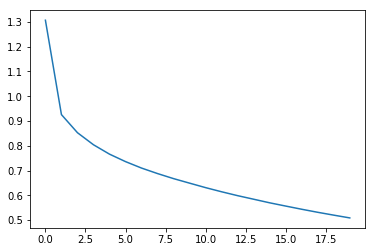

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(loss_epochs)

In [30]:
running_loss = 0
for i, data in enumerate(testloader):
    
    inputs, labels = data
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    running_loss += loss.item()
    
average_loss = running_loss / len(testloader)
print(f'Test accuracy: {average_loss}')

Test accuracy: 0.6068114137649536


In [31]:
from utils.plotting import show

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


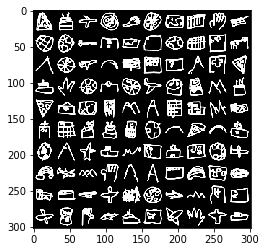

In [32]:
from torchvision.utils import make_grid

dataiter = iter(testloader)
images, labels = dataiter.next()

img = images.view((-1, 1, 28, 28))
grid = make_grid(img, nrow=10)

# print images
show(grid)

In [34]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)
predicted.view(10,10)

tensor([[9, 9, 4, 0, 8, 7, 1, 3, 8, 2],
        [0, 0, 4, 6, 1, 1, 0, 3, 6, 2],
        [5, 7, 4, 2, 3, 3, 1, 5, 6, 7],
        [9, 8, 7, 6, 7, 4, 9, 3, 5, 9],
        [7, 6, 1, 3, 5, 5, 3, 3, 4, 1],
        [6, 3, 9, 9, 3, 0, 2, 7, 2, 6],
        [7, 5, 4, 6, 4, 1, 6, 1, 0, 4],
        [2, 4, 5, 8, 5, 5, 3, 2, 1, 7],
        [3, 9, 4, 4, 0, 7, 4, 5, 6, 1],
        [4, 3, 8, 4, 9, 1, 4, 8, 4, 6]])